In [1]:
%cd ..

C:\Users\georg\Documents\msc-project


In [14]:
import pandas as pd
import numpy as np

from sklearn import svm,tree,naive_bayes,linear_model,dummy,ensemble
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV

from matplotlib import pyplot as plt

from src.optimization import optimize_svm,optimize_random_forest,optimize_lr
from src.evaluation import evaluate_model, compare_classification_models

In [3]:
df = pd.read_csv("data/interim/tracks.csv")

<AxesSubplot:>

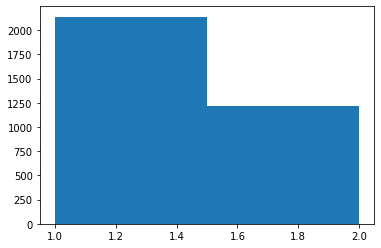

In [9]:
viral_threshold = 1e+06
features = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
    'duration_ms'
]

def get_data_for_threshold(threshold):
    views = df['views']
    data = df.loc[:,features]
    targets = views.apply(np.digitize,bins=[0,threshold,views.max() +1])

    nrm = MinMaxScaler()
    regularized = nrm.fit_transform(data)
    return regularized, targets

X,y = get_data_for_threshold(viral_threshold)
y.hist(bins=2, grid=False)

In [10]:
compare_classification_models(X,y)

Classifier                Pr   Re   Ac  
Baseline                  0.5  0.5  0.54
Decision Tree             0.5  0.5  0.54
Random Forest             0.56 0.53 0.63


c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC                       0.32 0.5  0.64
Logistic Regression       0.62 0.5  0.64
Complement Naive Bayes    0.5  0.5  0.54


c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
params = [{
    'penalty': ['elasticnet', 'l1', 'l2', 'none'],
    'C': [0.1, 1, 10],
    'class_weight': ['balanced', None],
    'solver': ['saga'],
    'l1_ratio': [0.1,0.5,1]
}]
optimizer = GridSearchCV(
    linear_model.LogisticRegression(),
    param_grid=params,
    scoring='f1_macro',
    n_jobs=3,
    verbose=4
)
optimizer.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=3,
             param_grid=[{'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                          'l1_ratio': [0.1, 0.5, 1],
                          'penalty': ['elasticnet', 'l1', 'l2', 'none'],
                          'solver': ['saga']}],
             scoring='f1_macro', verbose=4)

In [21]:
optimizer.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'l1_ratio': 0.5,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [22]:
estimator = optimizer.best_estimator_
evaluate_model(linear_model.LogisticRegression(),X,y)

[0.6186274148660589, 0.4995957708165972, 0.6362559779344708]